# Medical Data Visualizer

## Preview
![catplot](catplot.png)
![heatmap](heatmap.png)

## Process

### Data processing

The first step, Import libraries.

In [159]:
import matplotlib
matplotlib.use("ipympl")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print("success!")

success!


Import the data from `medical_examination.csv` and assign it to the `df` variable.

In [160]:
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an `overweight` column to the data. To determine if a person is overweight, 
1. Calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
2. If that value is > 25 then the person is overweight. Use the value `0` for NOT overweight and the value `1` for overweight.

In [161]:
df['overweight'] = (df['weight'] / (df['height']/100)**2 > 25).astype(int)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

Normalize data by making `0` always good and `1` always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [162]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### 1. Catplot

Create a DataFrame for the cat plot using `pd.melt` with values from `cholesterol`, `gluc`, `smoke`, `alco`, `active`, and `overweight` in the `df_cat` variable.

In [163]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


Group and reformat the data in `df_cat` to split it by `cardio`. Show the counts of each feature. You will have to rename one of the columns for the `catplot` to work correctly.

In [164]:
df_cat = df_cat.groupby(['cardio','variable'])['value'].value_counts()
print(df_cat)

cardio  variable     value
0       active       1        28643
                     0         6378
        alco         0        33080
                     1         1941
        cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        overweight   1        19106
                     0        15915
        smoke        0        31781
                     1         3240
1       active       1        27618
                     0         7361
        alco         0        33156
                     1         1823
        cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        overweight   1        24440
                     0        10539
        smoke        0        32050
                     1         2929
Name: count, dtype: int64


Convert the data into `long` format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: `sns.catplot()`.

In [165]:
df_cat_long = df_cat.reset_index(name='total')
df_cat_long.head()

,cardio,variable,value,total
0,0,active,1,28643
1,0,active,0,6378
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


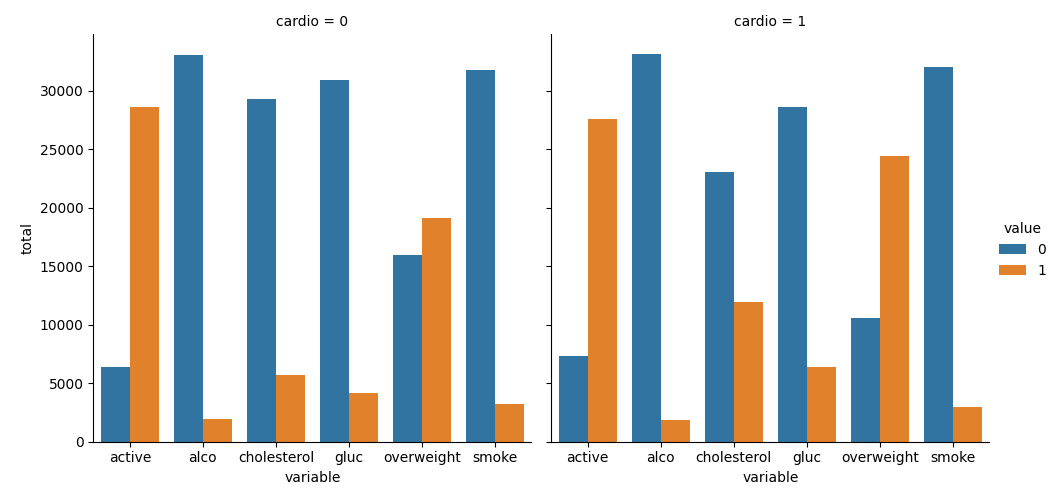

In [166]:
fig_catplot = sns.catplot(
    data=df_cat_long,
    hue='value',
    x='variable',
    y='total',
    col='cardio',
    kind="bar",
    errorbar=None
    )
plt.show()

Get the figure for the output and store it in the `fig`variable.

In [167]:
figure = fig_catplot.figure
figure.savefig('catplot.png')

### 2. Heatmap

Clean the data in the `df_heat` variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi']))`
- height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [168]:
df_heat = df[
            #diastolic pressure is higher than systolic
            (df['ap_lo']<=df['ap_hi']) &
            #Remove data that has height more than the 97.5th percentile , less than the 2.5th percentile
            (df['height']>=df['height'].quantile(0.025)) &
            (df['height']<=df['height'].quantile(0.975)) &
            #Remove data that has weight more than the 97.5th percentile , less than the 2.5th percentile
            (df['weight']>=df['weight'].quantile(0.025)) &
            (df['weight']<=df['weight'].quantile(0.975))
            ]
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Calculate the correlation matrix and store it in the `corr` variable.

In [169]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002871,0.003559,0.001012,0.000936,0.002896,0.001142,0.004159,0.002248,-0.001834,-0.000346,0.005777,0.003898,-0.000289
age,0.002871,1.000000,-0.016401,-0.076925,0.071650,0.021188,0.154586,0.130323,0.087694,-0.042193,-0.026728,-0.012165,0.240419,0.089587
sex,0.003559,-0.016401,1.000000,0.495375,0.121413,0.003478,0.059120,-0.037290,-0.021963,0.337618,0.166936,0.008771,0.003424,-0.051556
height,0.001012,-0.076925,0.495375,1.000000,0.240390,0.001840,0.014223,-0.064243,-0.032427,0.183578,0.084086,-0.003750,-0.023961,-0.147883
weight,0.000936,0.071650,0.121413,0.240390,1.000000,0.028190,0.226629,0.134989,0.104897,0.052085,0.056353,-0.013200,0.171317,0.661583
ap_hi,0.002896,0.021188,0.003478,0.001840,0.028190,1.000000,0.075537,0.024998,0.012344,-0.001696,0.001007,-0.000969,0.052045,0.020104
ap_lo,0.001142,0.154586,0.059120,0.014223,0.226629,0.075537,1.000000,0.149916,0.074448,0.023740,0.032205,0.002666,0.327413,0.172964
cholesterol,0.004159,0.130323,-0.037290,-0.064243,0.134989,0.024998,0.149916,1.000000,0.383649,0.012563,0.037591,0.002712,0.203942,0.126748
gluc,0.002248,0.087694,-0.021963,-0.032427,0.104897,0.012344,0.074448,0.383649,1.000000,-0.005268,0.013238,-0.010042,0.089089,0.086529
smoke,-0.001834,-0.042193,0.337618,0.183578,0.052085,-0.001696,0.023740,0.012563,-0.005268,1.000000,0.338451,0.026288,-0.020403,-0.002657


Generate a mask for the upper triangle and store it in the `mask` variable.

In [170]:
mask = np.triu(np.ones_like(corr,dtype=bool))

Set up the `matplotlib` figure.

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8, 7),constrained_layout=True)

Plot the correlation matrix using the method provided by the `seaborn` library import: `sns.heatmap()`.

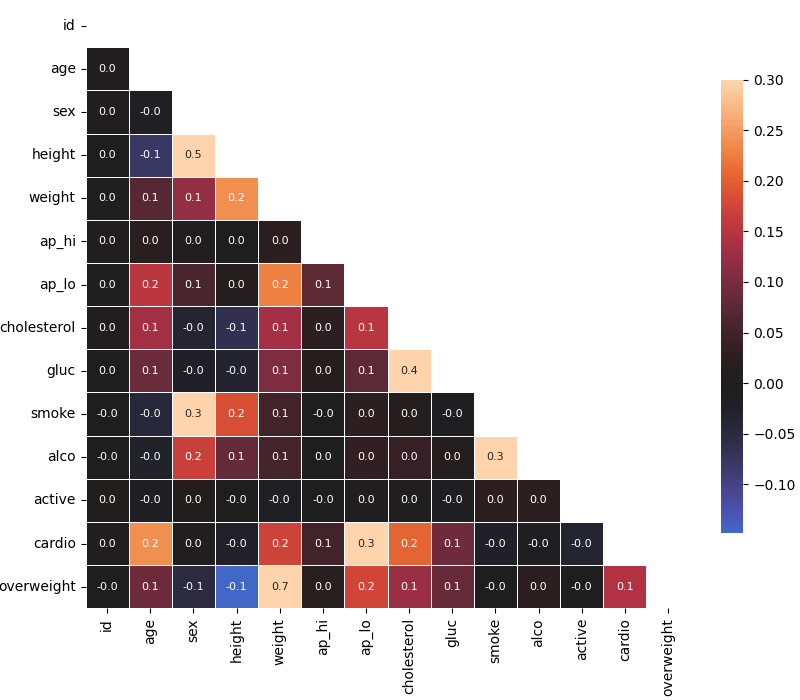

In [175]:
heatmap_plot = sns.heatmap(
    corr,
    square=True,
    mask=mask,
    vmax=0.30,
    center=0,
    annot=True,
    fmt="0.1f",
    linewidths=.5,
    annot_kws={'fontsize': 8}, 
    cbar_kws={"shrink": .75},
    ax=ax
)
fig.savefig('heatmap.png')
plt.show()
